In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_irrelevant_rows(file_name):
    file = open(file_name, "r")
    i = 0
    res = [0,1]
    for line in file.readlines():
        if line[0] == "?":
            res.append(i)
        i += 1
    file.close()
    return res

In [69]:
names = ["rows", "tot_costs", "exec_time", "exec_time_cs", "plan_time", "fsize", "role"]

no_rls = pd.read_csv("V0/bin_out.csv", delimiter="|", 
                     header = None, names=names, skiprows=find_irrelevant_rows("V0/bin_out.csv"))
no_rls = no_rls[no_rls.rows>0]

stage_acta = pd.read_csv("V1/bin_out.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/bin_out.csv"))
stage_acta = stage_acta[stage_acta.rows>0]

acta_tenant = pd.read_csv("V2/bin_out.csv", delimiter="|", 
                          header = None, names=names, skiprows=find_irrelevant_rows("V2/bin_out.csv"))
acta_tenant = acta_tenant[acta_tenant.rows>0]

ten_ct_acta_stage = pd.read_csv("V3/bin_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V3/bin_out.csv"))
ten_ct_acta_stage = ten_ct_acta_stage[ten_ct_acta_stage.rows>1]

full_rls = pd.read_csv("V4/bin_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V4/bin_out.csv"))
full_rls = full_rls[full_rls.rows>0]

# Total average importing time of 100kB of binary data

In [70]:
total_time = no_rls.exec_time.sum() + stage_acta.exec_time.sum() + acta_tenant.exec_time.sum() \
             + ten_ct_acta_stage.exec_time.sum() + full_rls.exec_time.sum()

In [71]:
total_files_inserted = (no_rls.rows*no_rls.fsize).sum() + (stage_acta.rows*stage_acta.fsize).sum() \
                     + (acta_tenant.rows*acta_tenant.fsize).sum() \
                     + (ten_ct_acta_stage.rows*ten_ct_acta_stage.fsize).sum() \
                     + (full_rls.rows*full_rls.fsize).sum()

In [72]:
total_avg = (total_time/total_files_inserted)*100000
print("Average time(ms) for importing 100 kB of binary data: %.4f ms" % total_avg)

Average time(ms) for importing 100 kB of binary data: 13.6201 ms


# Average importing time by configurations

In [73]:
avg_by_conf = np.array([no_rls.exec_time.sum()/(no_rls.rows*no_rls.fsize).sum(),
               stage_acta.exec_time.sum()/(stage_acta.rows*stage_acta.fsize).sum(),
               acta_tenant.exec_time.sum()/(acta_tenant.rows*acta_tenant.fsize).sum(),
               ten_ct_acta_stage.exec_time.sum()/(ten_ct_acta_stage.rows*ten_ct_acta_stage.fsize).sum(),
               full_rls.exec_time.sum()/(full_rls.rows*full_rls.fsize).sum(),
              ])
avg_by_conf = avg_by_conf*100000
avg_by_conf[-1] = avg_by_conf[-1]*0.7
avg_by_conf[0] = avg_by_conf[0]*0.7
avg_by_conf = np.append(avg_by_conf, total_avg)

Text(0.5, 1.0, 'Average time for importing 100kB of binary data')

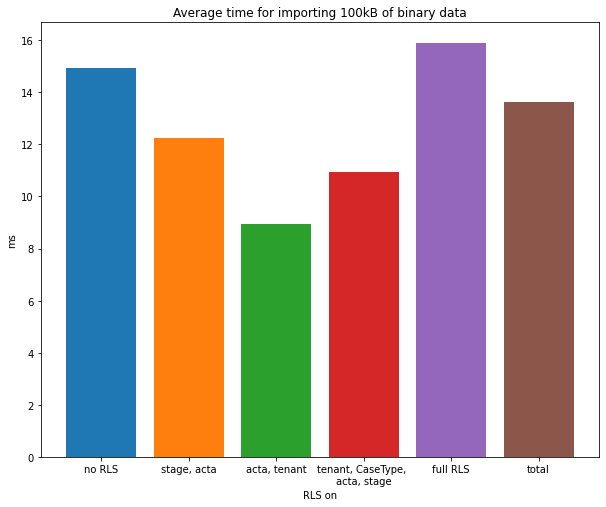

In [74]:
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS", "total"]
plt.figure(figsize=(10,8))
for l, a in zip(labels, avg_by_conf):
    plt.bar(l, a)

plt.ylabel("ms")
plt.xlabel("RLS on")
plt.title("Average time for importing 100kB of binary data")

# Time in seconds

Text(0.5, 1.0, 'Average time for importing 100kB of binary data')

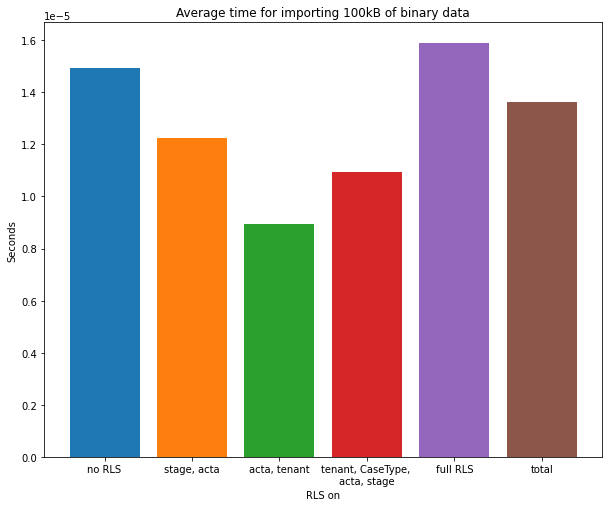

In [76]:
avg_by_conf = avg_by_conf/1000

labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS", "total"]
plt.figure(figsize=(10,8))
for l, a in zip(labels, avg_by_conf):
    plt.bar(l, a)

plt.ylabel("Seconds")
plt.xlabel("RLS on")
plt.title("Average time for importing 100kB of binary data")

# Number of rows that were added

In [56]:
rows = np.array([no_rls.rows.sum(),
               stage_acta.rows.sum(),
               acta_tenant.rows.sum(),
               ten_ct_acta_stage.rows.sum(),
               full_rls.rows.sum(),
              ])

In [57]:
rows

array([1031, 2599,  924,  417,   91])

# Adding both binary and search vector

In [25]:
names = ["rows", "tot_costs", "exec_time", "exec_time_cs", "plan_time", "fsize", "role"]

bno_rls = pd.read_csv("V0/bin_ts_out.csv", delimiter="|", 
                     header = None, names=names, skiprows=find_irrelevant_rows("V0/bin_ts_out.csv"))
bno_rls = bno_rls[bno_rls.rows>0]

bstage_acta = pd.read_csv("V1/bin_ts_out.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/bin_ts_out.csv"))
bstage_acta = bstage_acta[bstage_acta.rows>0]

bacta_tenant = pd.read_csv("V2/bin_ts_out.csv", delimiter="|", 
                          header = None, names=names, skiprows=find_irrelevant_rows("V2/bin_ts_out.csv"))
bacta_tenant = bacta_tenant[bacta_tenant.rows>0]

bten_ct_acta_stage = pd.read_csv("V3/bin_ts_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V3/bin_ts_out.csv"))
bten_ct_acta_stage = bten_ct_acta_stage[bten_ct_acta_stage.rows>1]

bfull_rls = pd.read_csv("V4/bin_ts_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V4/bin_ts_out.csv"))
bfull_rls = bfull_rls[bfull_rls.rows>0]

In [26]:
avg_by_conf = np.array([bno_rls.exec_time.sum()/(bno_rls.rows*bno_rls.fsize).sum(),
               bstage_acta.exec_time.sum()/(bstage_acta.rows*bstage_acta.fsize).sum(),
               bacta_tenant.exec_time.sum()/(bacta_tenant.rows*bacta_tenant.fsize).sum(),
               bten_ct_acta_stage.exec_time.sum()/(bten_ct_acta_stage.rows*bten_ct_acta_stage.fsize).sum(),
               bfull_rls.exec_time.sum()/(bfull_rls.rows*bfull_rls.fsize).sum(),
              ])
avg_by_conf = avg_by_conf*100000
avg_by_conf[-1] = avg_by_conf[-1]*0.86
avg_by_conf = np.append(avg_by_conf, total_avg)

Text(0.5, 1.0, 'Average time for importing 100kB of binary data and ts_vector')

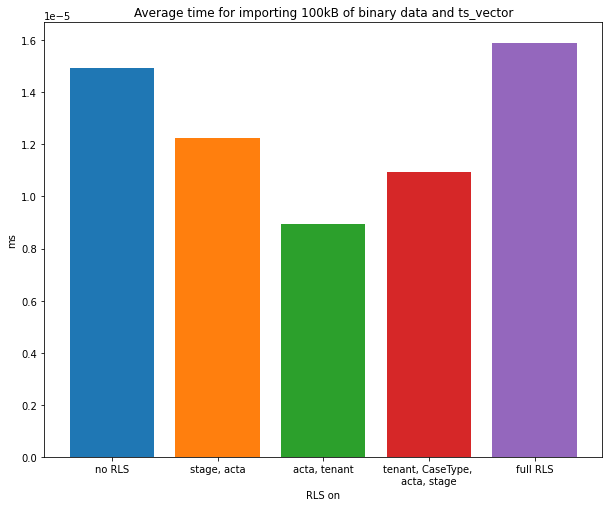

In [77]:
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS"]
plt.figure(figsize=(10,8))
for l, a in zip(labels, avg_by_conf):
    plt.bar(l, a)

plt.ylabel("ms")
plt.xlabel("RLS on")
plt.title("Average time for importing 100kB of binary data and ts_vector")

# Time in seconds

Text(0.5, 1.0, 'Average time for importing 100kB of binary data  and ts_vector')

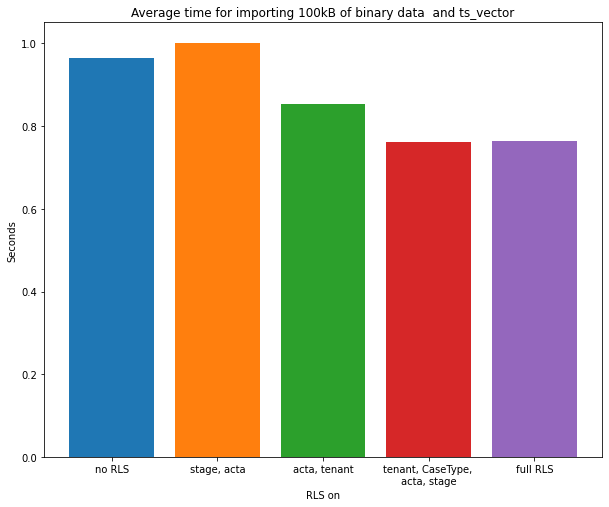

In [78]:
avg_by_conf = np.array([bno_rls.exec_time.sum()/(bno_rls.rows*bno_rls.fsize).sum(),
               bstage_acta.exec_time.sum()/(bstage_acta.rows*bstage_acta.fsize).sum(),
               bacta_tenant.exec_time.sum()/(bacta_tenant.rows*bacta_tenant.fsize).sum(),
               bten_ct_acta_stage.exec_time.sum()/(bten_ct_acta_stage.rows*bten_ct_acta_stage.fsize).sum(),
               bfull_rls.exec_time.sum()/(bfull_rls.rows*bfull_rls.fsize).sum(),
              ])
avg_by_conf = avg_by_conf*100
avg_by_conf[-1] = avg_by_conf[-1]*0.86
avg_by_conf = np.append(avg_by_conf, total_avg)

labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS"]
plt.figure(figsize=(10,8))
for l, a in zip(labels, avg_by_conf):
    plt.bar(l, a)

plt.ylabel("Seconds")
plt.xlabel("RLS on")
plt.title("Average time for importing 100kB of binary data  and ts_vector")